# 0.1. Анализ продаж компьютерных игр в интернет-магазине

### 0.1.1 В работе представлена таблица с историческими данными о продажах игр, оценками пользователей и экспертов, жанрами и платформами до 2016 года

#### 0.1.2 Данное исследование разделим на несколько частей:
##### 0.1.2.1 1. Изучение общей информации:
* Импорт библиотек
* Загрузка датафрейма
* Анализ первых 20 строк
* Получение информации
* Промежуточные выводы
##### 0.1.2.2 2. Предобработка данных:
* изменение названий столбцов
* Заполнение пропусков
* Изменение типов данных
* Суммирование продаж со всех регионов
* Проверка на наличие дубликатов
* Вывод
##### 0.1.2.3 3. Исследовательский анализ данных:
* Количество выпускаемых игр каждый год
* Количество продаж по платформам
* Количество продаж по платформам в актуальном периоде¶
* Ящик с усами по глобальным продажам игр в разбивке по платформам
* Влияние оценок на продажи
* Продажи по жарнрам
##### 0.1.2.4 4. Изучение портрета пользователя каждого региона:
* Северная Америка
* Европа
* Япония
* Вывод
##### 0.1.2.5 5. Проверка гипотез:
* Гипотеза №1
* Гипотеза №2
* Вывод
##### 0.1.2.6 6. Общий вывод

## 1. Изучение общей информации

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

Загрузка датафрейма

In [2]:
df = pd.read_csv('games.csv', sep=',')

Рассмотрим первые 20 строк

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Рассмотрим общую информацию о столбцах

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Промежуточные выводы

В ходе первичного изучения данных была получена общая информация о датафрейме:
> Всего **11** столбцов и **16715** строк;

Названия столбцов:
1. ***Name*** — название игры
2. ***Platform*** — платформа
3. ***Year_of_Release*** — год выпуска
4. ***Genre*** — жанр игры
5. ***NA_sales*** — продажи в Северной Америке (миллионы проданных копий)
6. ***EU_sales*** — продажи в Европе (миллионы проданных копий)
7. ***JP_sales*** — продажи в Японии (миллионы проданных копий)
8. ***Other_sales*** — продажи в других странах (миллионы проданных копий)
9. ***Critic_Score*** — оценка критиков (максимум 100)
10. ***User_Score*** — оценка пользователей (максимум 10)
11. ***Rating*** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Было обнаружено, что в следующих столбцах присутствуют пропуски:
- В столбце ***Name*** в размере *2* штук (0.01% от общего количества строк);
- В столбце ***Year_of_Release*** в размере *269* штук (1.61% от общего количества строк);
- В столбце ***Genre*** в размере *2* штук (0.01% от общего количества строк);
- В столбце ***Critic_Score*** в размере *8398* штук (50.24% от общего количества строк);
- В столбце ***User_Score*** в размере *6701* штук (40.1% от общего количества строк);
- В столбце ***Rating*** в размере *6766* штук (40.5% от общего количества строк).

Помимо этого, было обнаружено, что к некоторым столбцам с данными относятся некорректные типы данных:
- Столбец ***Year_of_Release*** имеет тип данных *float*, стоило бы перевести в *int*, так как столбец отражает годы релизов.
- Столбец ***User_Score*** имеет тип данных *object*, но данные могут отражать десятичное число, поэтому стоит перевести в тип данных *float*

## 2. Предобработка данных

### 2.1 Изменение названий столбцов

Переведем названия столбцов к нижнему регистру

In [5]:
for i in df.columns:
    df = df.rename(columns={i:i.lower()})

Проверим изменение регистра столбцов

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Действительно, столбцы перевелись к нижнему регистру

### 2.2 Заполнение пропусков в данных

Проверим еще раз количество пропусков в столбцах

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Столбец name

Выведем строки с пропусками в данном столбце

In [8]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как пропусков менее 3% (0.01%), их удаление не повлияет на дальнейшее исследование

In [9]:
df = df.dropna(subset=['name']).reset_index(drop=True)

#### Столбец year_of_release

С учетом того, что процент пропусков в данном столбце составляет примерно **1.61** процент, мы можем себе позволить удалить данные значения

In [10]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

#### Столбец genre

Выведем строки с пропусками в данном столбце

In [11]:
df[df['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Процент пропусков в данном столбце составляет менее 3% (0.01%), соответственно мы можем удалить данные строки

In [12]:
df = df.dropna(subset=['genre']).reset_index(drop=True)

#### Столбцы critic_score и user_score

Так как предсказать оценку пользователей и критиков невозможно, то и заменять какими-либо значениями будет некорректно, поэтому оставим пропуски.

Помимо этого, в столбце user_score вместо оценки имеется значение tbd или To Be Determined, которое означает, что рейтинг еще не определен. Предлагается вместо этой аббревиатуры писать нули

In [13]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)

Проверим замену:

In [14]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


#### Столбец rating

Как мы знаем, рейтинговая система в данном случае основана на системе ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. Работать она начала с 1994 года.

Рассмотрим, какие в нашем датафрейме представлены рейтинги перед тем, как заполнять пропуски

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рассмотрим каждый тип подробнее:
- E (Everyone) – Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
- M (Mature) – Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- T (Teen) – Для подростков от 13 лет, тут уже есть и немного крови, грубая речь в духе «ублюдок мать твою иди сюда», но и еще не уровень Сэмюэля л. Джексона, и темы наводящие на размышления.
- E10+ (Everyone 10+ – Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- K-A (Kids to Adults) –  Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес (позже в 1998 году был переименован в Е – для всех возрастов)
- AO (Adults Only) - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- EC (Early Childhood) – Для самых маленьких – детские проекты для тех, кто только научился держать джойстик. Его стоит перевести в категорию "E"
- RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Переведем рейтинги K-A и EC в E

In [16]:
df = df.replace(['K-A', 'EC'], 'E')

Проверим изменения:

In [17]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

Помимо этого, у нас имебтся пропущенные данные. Сложно сказать, в связи с чем игра не получила свой рейтинг, поэтому предлагается обозначить пропущенные данные меткой "Без рейтинга"

In [18]:
df['rating'] = df['rating'].fillna('Без рейтинга')

Проверим заполнение

In [19]:
df['rating'].unique()

array(['E', 'Без рейтинга', 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

Проверим весь датафрейм после заполнения пропусков

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.3 Изменение типов данных

Как нам известно из первичного анализа данных, нам требуется перевести столбец Year_of_Release в int. Посмотрим еще раз на имеющиеся типы данных

In [21]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Переведем рассматриваемые столбцы в необходимые типы данных

In [22]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = pd.to_numeric(df['user_score'])
df['user_score']=df['user_score'].astype('float64')

### 2.4 Суммирование продаж со всех регионов

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Без рейтинга,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Без рейтинга,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Без рейтинга,0.01


### 2.5 Проверка на наличие дубликатов

Проверим, имеются ли дубликаты в данных

In [25]:
df.duplicated().sum()

0

Отлично! Дубликатов нет.

### Вывод

После проведения предобработки данных, мы изменили названия столбцов и привели их в корректный вид, изменили тип данных у двух столбцов, проверили датафрейм на пропуски в данных и заполнили пропуски.

## 3. Исследовательский анализ данных

### 3.1 Количество выпускаемых игр каждый год
Задание:
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Сформируем сводную таблицу, отражающую количетво выпускемых игр каждый год. Возьмем в учет только те игры, для которых известен год публикации (т.е большие 0)

In [26]:
df.pivot_table(index='year_of_release',aggfunc={'year_of_release':'count'})

,year_of_release
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим столбчатую гистограмму, отражающую количество выпускаемых игр каждый год по полученной сводной таблице

Text(0, 0.5, 'Количество выпускаемых игр')

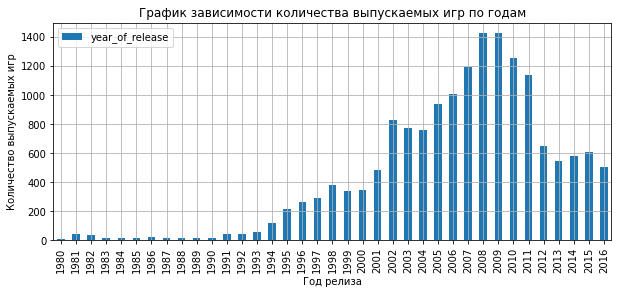

In [27]:
df.pivot_table(index='year_of_release',aggfunc={'year_of_release':'count'}).plot(kind='bar', grid=True, figsize=(10,4))
plt.xlabel('Год релиза')
plt.title('График зависимости количества выпускаемых игр по годам')
plt.ylabel('Количество выпускаемых игр')

По графику видно, что до 1994 года выпускали пренебрежимо малое количество игр. Далее следовал период роста до 2009 года и последующий спад. Спад может быть связан с наступлением мирового кризиса, спрос на игры упал, игровые студии обанкротились и не могли много игр выпускать.

### 3.2 Количество продаж по платформам
Задание:
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сформируем сводную таблицу, отражающую сумму общих продаж по каждой платформе и отсортируем их по убыванию

In [28]:
pd.pivot_table(df, index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Рассмотрим первые 6 платформ

#### PS2

Text(0, 0.5, 'Количество проданных игр, млн. копий')

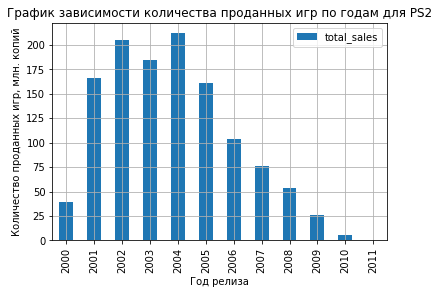

In [29]:
df.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title='PS2', grid=True)
plt.xlabel('Год релиза')
plt.title('График зависимости количества проданных игр по годам для PS2')
plt.ylabel('Количество проданных игр, млн. копий')

Видно, что жизненный цикл популярности данной платформы составляет примерно 7 лет

#### X360

Text(0, 0.5, 'Количество проданных игр, млн. копий')

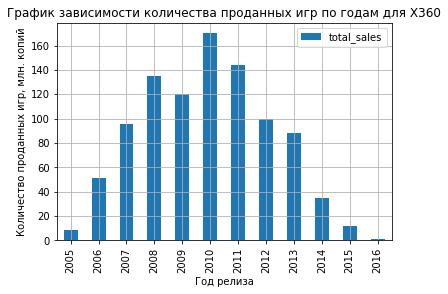

In [30]:
df.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title='X360', grid=True)
plt.xlabel('Год релиза')
plt.title('График зависимости количества проданных игр по годам для X360')
plt.ylabel('Количество проданных игр, млн. копий')

Видно, что жизненный цикл популярности данной платформы составляет примерно 7 лет

#### PS3

Text(0, 0.5, 'Количество проданных игр, млн. копий')

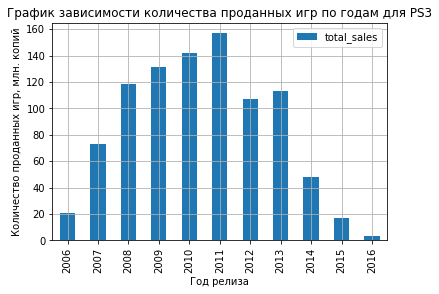

In [31]:
df.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title='PS3', grid=True)
plt.xlabel('Год релиза')
plt.title('График зависимости количества проданных игр по годам для PS3')
plt.ylabel('Количество проданных игр, млн. копий')

Видно, что жизненный цикл популярности данной платформы составляет примерно 7 лет

#### Wii

Text(0, 0.5, 'Количество проданных игр, млн. копий')

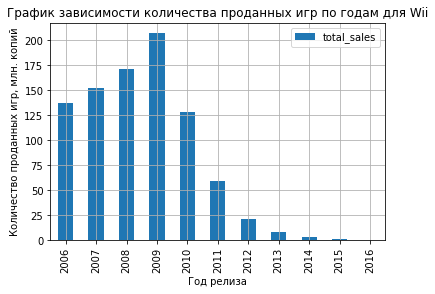

In [32]:
df.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title='Wii', grid=True)
plt.xlabel('Год релиза')
plt.title('График зависимости количества проданных игр по годам для Wii')
plt.ylabel('Количество проданных игр, млн. копий')

Видно, что жизненный цикл популярности данной платформы составляет примерно 5 лет

#### DS

Text(0, 0.5, 'Количество проданных игр, млн. копий')

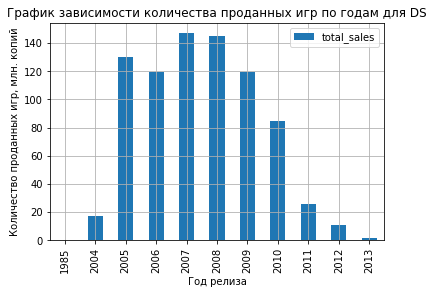

In [33]:
df.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title='DS', grid=True)
plt.xlabel('Год релиза')
plt.title('График зависимости количества проданных игр по годам для DS')
plt.ylabel('Количество проданных игр, млн. копий')

Видно, что жизненный цикл популярности данной платформы составляет примерно 6 лет

#### PS

Text(0, 0.5, 'Количество проданных игр, млн. копий')

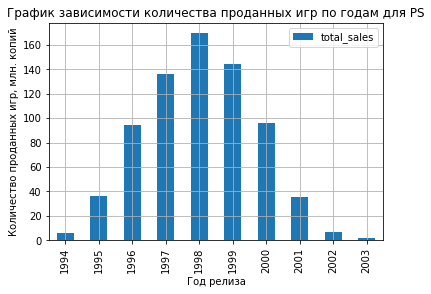

In [34]:
df.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title='PS', grid=True)
plt.xlabel('Год релиза')
plt.title('График зависимости количества проданных игр по годам для PS')
plt.ylabel('Количество проданных игр, млн. копий')

Видно, что жизненный цикл популярности данной платформы составляет примерно 5 лет

**Тем самым, можно сделать вывод, что в среднем платформы переживают свой пик популярности в течение 5-7 лет.**

### 3.3 Количество продаж по платформам в актуальном периоде
Задание:
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


С учетом того, что в датафрейме указаны неполная информация за 2016 год, актуальным будем считать последние 2 полных года до 2017 (то есть промежуток 2014-2017), так как для прогнозирования продаж не требуется большой срез лет. Для данного актуального периода найдем последние популярные платформы

In [35]:
df.query('year_of_release >= 2014').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Построим графики, отражающие движение продаж в актуальном периоде каждый год по платформам

Text(0, 0.5, 'Количество проданных игр, млн. копий')

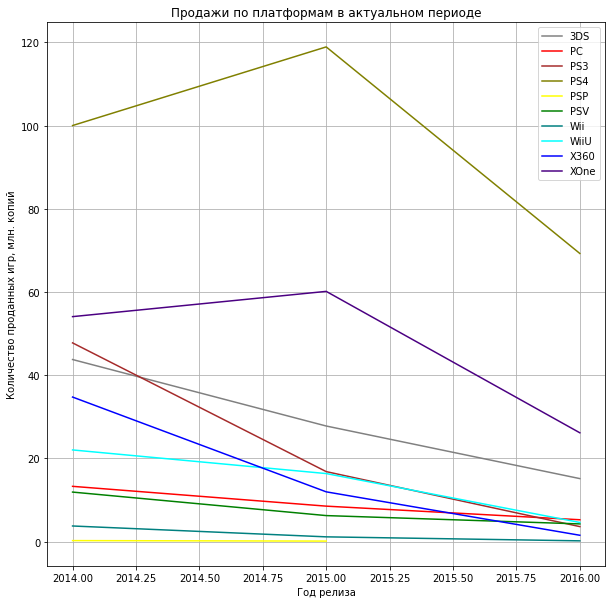

In [36]:
colors = ['grey', 'red', 'brown', 'olive', 'yellow', 'green', 'teal', 'aqua', 'blue', 'indigo', 'pink', 'peru', 'purple', 'khaki', 'violet', 'crimson', 'skyblue', 'tomato'] # палитра
df.query('year_of_release >= 2014').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line', grid=True, figsize=(10,10), color=colors).legend()
plt.xlabel('Год релиза')
plt.title('Продажи по платформам в актуальном периоде')
plt.ylabel('Количество проданных игр, млн. копий')

Видно, что лидерами являются PS4 и XOne, а PS3 и X360 к 2017 году заканчивают свой жизненный цикл. Выведем данные конца актуального периода цифрами:

In [37]:
df.query("year_of_release >= 2014").pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


### 3.4 boxplot по глобальным продажам игр в разбивке по платформам

Построим boxplot по глобальным продажам игр по тем же платформам, которые были фаворитами в актуальный период, а конкретно PS4, XOne, 3DS, PC, Wiiu .

In [38]:
ps4_sales = df.query('platform == "PS4"')['total_sales']
xone_sales = df.query('platform == "XOne"')['total_sales']
ds3_sales = df.query('platform == "3DS"')['total_sales']
pc_sales = df.query('platform == "PC"')['total_sales']
wiiu_sales = df.query('platform == "WiiU"')['total_sales']

<div style="border-radius: 3px; border: 2px solid black; padding: 0px;">
<div class="alert alert-block alert-info">
<b>Комментарий студента 🎓:</b>
Исправлено
</div>
</div>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaf5ef8190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaf5f49c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaf5edfa00>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbaf5efd7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaf5f158b0>,
 'means': []}

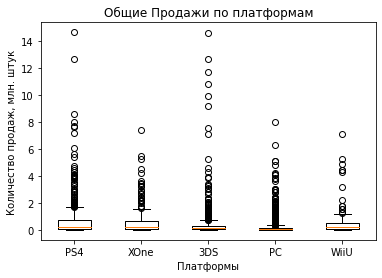

In [39]:
plt.title('Общие Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж, млн. штук')
plt.boxplot([ps4_sales, xone_sales, ds3_sales, pc_sales, wiiu_sales], labels=['PS4','XOne','3DS','PC', 'WiiU'])

Построим boxplot без выбросов, для подробного рассмотрения рабочей площади графиков

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaf5aa1400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaf5aa1ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaf5aa10a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbaf5aae1c0>,
 'fliers': [],
 'means': []}

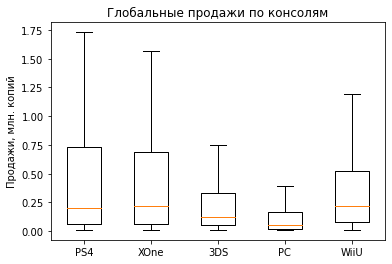

In [40]:
plt.ylabel('Продажи, млн. копий')
plt.title('Глобальные продажи по консолям')
plt.boxplot([ps4_sales, xone_sales, ds3_sales, pc_sales, wiiu_sales], labels=['PS4','XOne','3DS','PC', 'WiiU'], showfliers=False)

Рассмотрим каждую платформу подробнее

In [41]:
ps4_sales.describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [42]:
xone_sales.describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [43]:
ds3_sales.describe()

count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: total_sales, dtype: float64

In [44]:
pc_sales.describe()

count    957.000000
mean       0.267252
std        0.679745
min        0.010000
25%        0.020000
50%        0.050000
75%        0.170000
max        8.010000
Name: total_sales, dtype: float64

In [45]:
wiiu_sales.describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64

По полученным данным можно сделать вывод, что у PS4 выше продажи (можно сравнить третьи квартили 75% и увидеть, у ps4 он наибольший, а у Xone он на втором месте по величине), однако самое крупное медианное значение у XOne.
Платформы WiiU, PC и 3DS уже не пользуются такой популярностью, как игровые приставки, описанные выше.

### 3.5 Влияние оценок на продажи
Задания:
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.

В данном пункте будем рассматривать две самые популярные к концу данного периода платформы: PS4 и XOne за актуальный период. Сформируем сводные таблицы, которые содержат оценки критиков и игроков и средние продажи, относящиеся к каждой оценке

In [46]:
PS4_critic = df.query('year_of_release >= 2014 & platform == "PS4"').pivot_table(index='critic_score', values='total_sales', aggfunc='mean').reset_index()

In [47]:
PS4_user = df.query('year_of_release >= 2014 & platform == "PS4"').pivot_table(index='user_score', values='total_sales', aggfunc='mean').reset_index()

In [48]:
XOne_critic = df.query('year_of_release >= 2014 & platform == "XOne"').pivot_table(index='critic_score', values='total_sales', aggfunc='mean').reset_index()
XOne_user = df.query('year_of_release >= 2014 & platform == "XOne"').pivot_table(index='user_score', values='total_sales', aggfunc='mean').reset_index()

Построим диаграммы расеяния для PS4 и рассчитаем коэффициенты корреляции:

PS4: Коэффициент корреляции числа продаж и оценки критиков составляет  0.5536810134529617
PS4: Коэффициент корреляции числа продаж и оценки пользователей составляет  0.16499667507203533


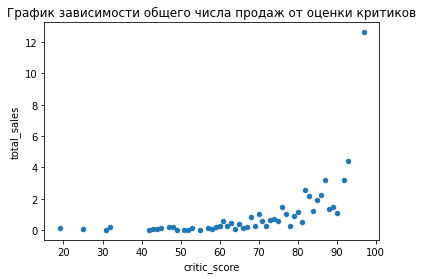

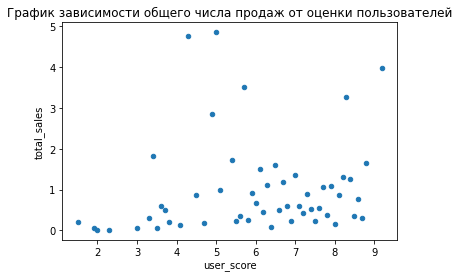

In [49]:
PS4_critic.plot(kind='scatter', x='critic_score', y='total_sales', title='График зависимости общего числа продаж от оценки критиков')
print('PS4: Коэффициент корреляции числа продаж и оценки критиков составляет ', PS4_critic['critic_score'].corr(PS4_critic['total_sales']))
PS4_user.plot(kind='scatter', x='user_score', y='total_sales', title='График зависимости общего числа продаж от оценки пользователей')
print('PS4: Коэффициент корреляции числа продаж и оценки пользователей составляет ', PS4_user['user_score'].corr(PS4_user['total_sales']))

Коэффициент корреляции числа продаж и оценки критиков для PS4 составляет 0.55, это соответствует умеренной положительной зависимости
Коэффициент корреляции числа продаж и оценки пользователей для PS4 составляет 0.16, это соответствует слабой положительной зависимости (даже о ее отсутствии)

XOne: Коэффициент корреляции числа продаж и оценки критиков составляет  0.620387012595566
XOne: Коэффициент корреляции числа продаж и оценки пользователей составляет  -0.04479192708810901


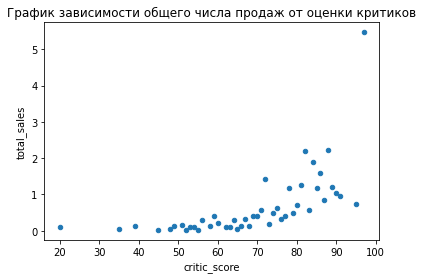

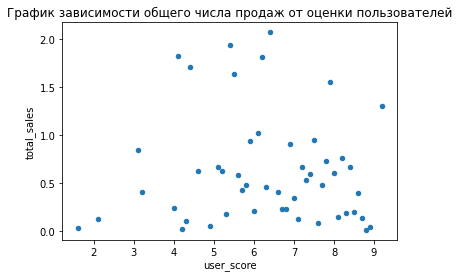

In [50]:
XOne_critic.plot(kind='scatter', x='critic_score', y='total_sales', title='График зависимости общего числа продаж от оценки критиков')
print('XOne: Коэффициент корреляции числа продаж и оценки критиков составляет ', XOne_critic['critic_score'].corr(XOne_critic['total_sales']))
XOne_user.plot(kind='scatter', x='user_score', y='total_sales', title='График зависимости общего числа продаж от оценки пользователей')
print('XOne: Коэффициент корреляции числа продаж и оценки пользователей составляет ', XOne_user['user_score'].corr(XOne_user['total_sales']))

Коэффициент корреляции числа продаж и оценки критиков для XOne составляет 0.61, это соответствует умеренной положительной зависимости
Коэффициент корреляции числа продаж и оценки пользователей для XOne составляет -0.02, это соответствует отсутствии корреляции

Вывод: Продажи игр коррелируют с оценками критиков для двух платформ, но не коррелируют с оценками пользователей. Вероятнее всего, такая же ситуация прослеживается, и с другими платформами: Пользователи обращают внимание исключительно на оценки критиков.

### 3.6 Продажи по жанрам
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сформируем сводную таблицу с продажами по жанрам на платформах PS4, XOne, 3DS, PC и построим график

<AxesSubplot:title={'center':'Продажи по жанрам'}, xlabel='year_of_release'>

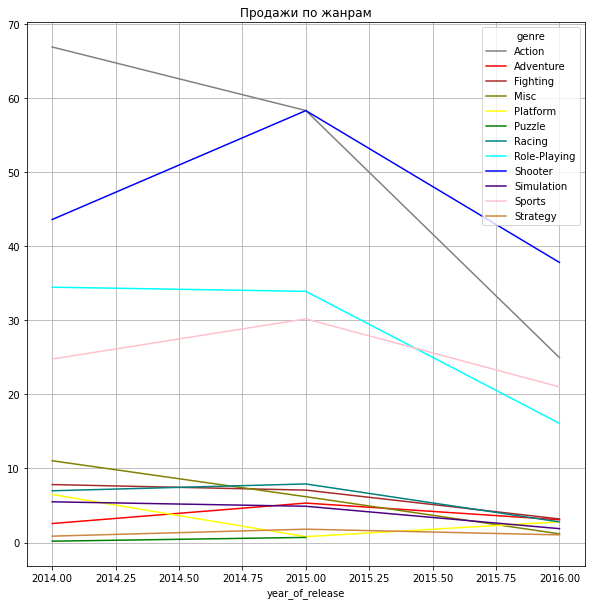

In [51]:
platforms = ['PS4', 'XOne', '3DS', 'PC']
df.query("year_of_release >= 2014 & platform in @platforms").pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum').plot(kind='line', title='Продажи по жанрам', grid=True, figsize=(10,10), legend=True, color=colors)

Попробуем построить такие же графики, только по средним и медианным продажам игр:

<AxesSubplot:title={'center':'Продажи по жанрам'}, xlabel='year_of_release'>

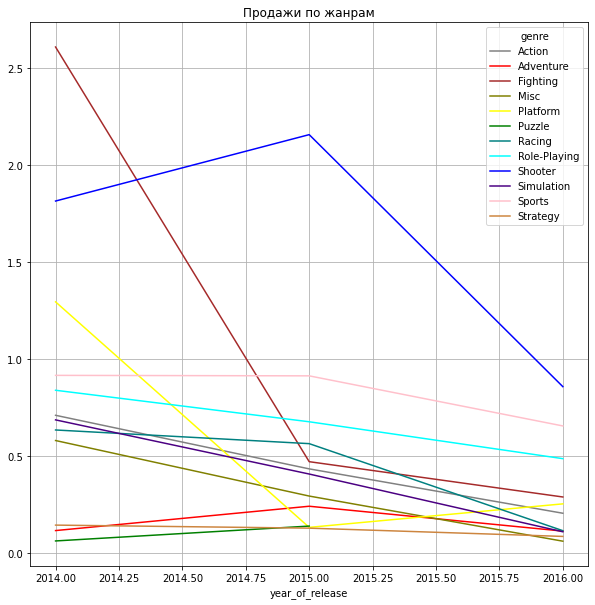

In [52]:
df.query("year_of_release >= 2014 & platform in @platforms").pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='mean').plot(kind='line', title='Продажи по жанрам', grid=True, figsize=(10,10), legend=True, color=colors)

<AxesSubplot:title={'center':'Продажи по жанрам'}, xlabel='year_of_release'>

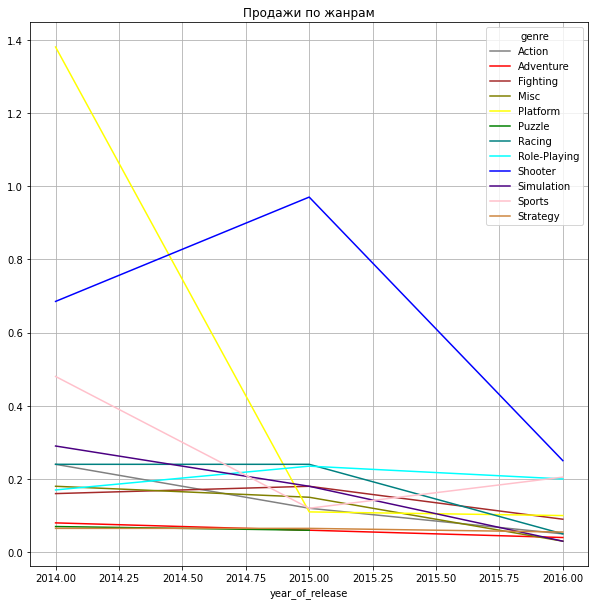

In [53]:
df.query("year_of_release >= 2014 & platform in @platforms").pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='median').plot(kind='line', title='Продажи по жанрам', grid=True, figsize=(10,10), legend=True, color=colors)

Из трех графиков можно сделать вывод, что самые популярные жанры – это Action, Shooter, Sports, Role-Playing.
Если обратить внимание на средние продажи, то самыми популярными жанрами будут Shooter, Sports, Role-Playing.
Если обратить внимание на медианные продажи, то самыми популярными жанрами тоже будут Shooter, Sports, Role-Playing
по графику суммарных продаж видно, что жанр action очень популярен, однако по графикам средних и медианных продаж видно, что продажа игр этого жанра приносит намного меньше прибыли, чем Шутеры. Следовательно, фаворитом среди жанром стоило бы выделить Шутеры.

## 4. Составьте портрет пользователя каждого региона
Задание: Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Северная Америка

Сформируем сводную таблицу, показывающую количество продаж игр для каждой платформы в Северной Америке и отсортируем по убыванию

In [54]:
df.query("year_of_release >= 2014").pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

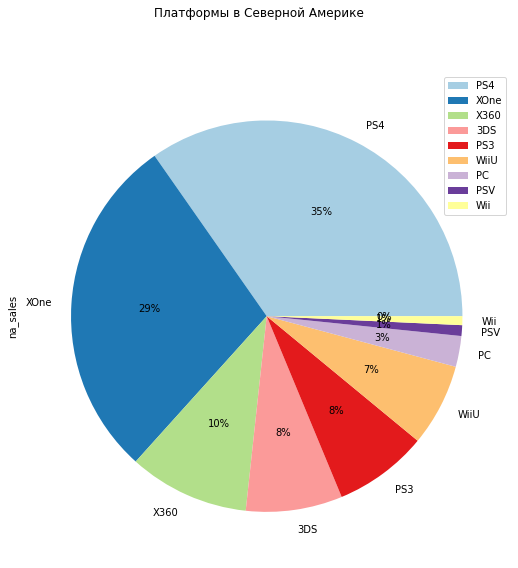

In [55]:
df.query("year_of_release >= 2014").pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Платформы в Северной Америке', colormap='Paired')

Видно, что 25% от всех продаж игр приходится на PS4, далее с небольшим отрывом идут XOne со своими 21%, далее X360 с 19%, PS3 с 15%, 3DS с 9%.

Сформируем сводную таблицу, показывающую количество продаж игр для каждого жанра в Северной Америке и отсортируем по убыванию

In [56]:
df.query("year_of_release >= 2014").pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

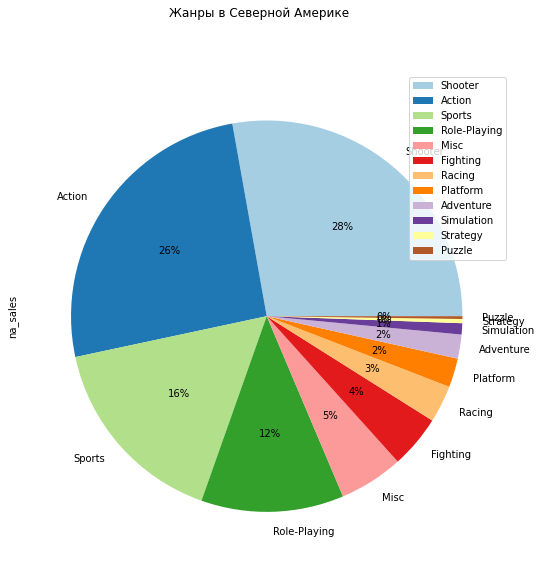

In [57]:
df.query("year_of_release >= 2014").pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Жанры в Северной Америке', colormap='Paired')

Видно, что 29% от всех продаж игр приходится на Action, далее с небольшим отрывом идет Shooter со своими 25%, далее Sports с 15%, Role-Playing с 11%, Misc с 6%.

Сформируем сводную таблицу, показывающую количество продаж игр для типа рейтинга в Северной Америке и отсортируем по убыванию

In [58]:
df.query("year_of_release >= 2014").pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,96.42
Без рейтинга,64.72
E,50.74
T,38.95
E10+,33.23


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

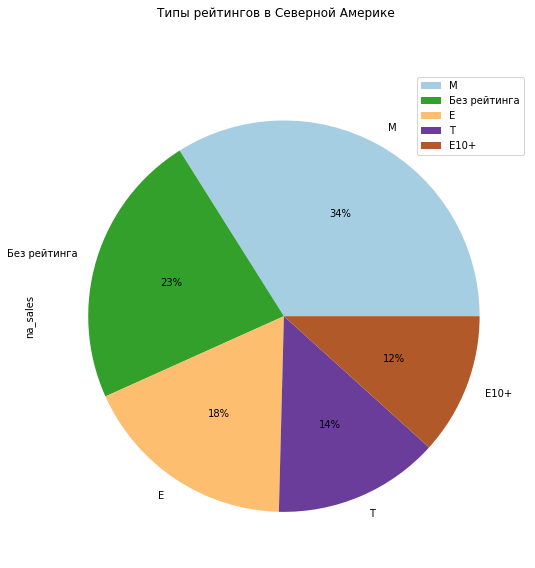

In [59]:
df.query("year_of_release >= 2014").pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Типы рейтингов в Северной Америке', colormap='Paired')

Видно, что 29% от всех продаж игр приходится на Тип рейтинга M, далее идут игры без рейтинга со своими 20%, далее E с 18%, E10+ с 12%, T с 11%.

### Европа

Сформируем сводную таблицу, показывающую количество продаж игр для каждой платформы в Европе и отсортируем по убыванию

In [60]:
df.query("year_of_release >= 2014").pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='eu_sales'>], dtype=object)

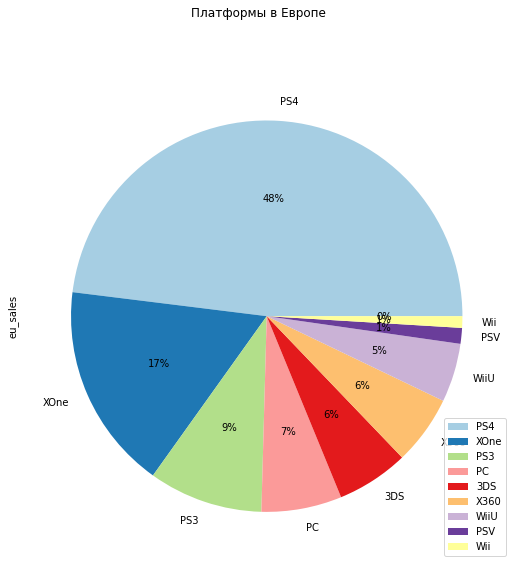

In [61]:
df.query("year_of_release >= 2014").pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Платформы в Европе', colormap='Paired')

Видно, что 36% от всех продаж игр приходится на PS4, далее с большим отрывом идут PS3 со своими 13%, примерно столько же у XOne с 13%, X360 с 13%, 3DS с 11%.

Сформируем сводную таблицу, показывающую количество продаж игр для каждого жанра в Европе и отсортируем по убыванию

In [62]:
df.query("year_of_release >= 2014").pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='eu_sales'>], dtype=object)

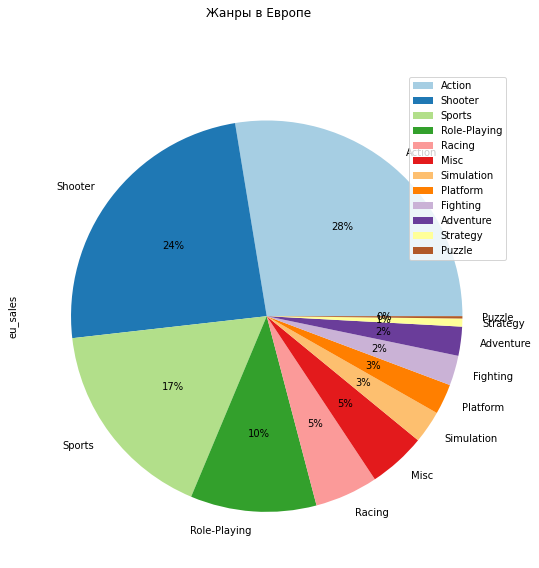

In [63]:
df.query("year_of_release >= 2014").pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Жанры в Европе', colormap='Paired')

Видно, что 30% от всех продаж игр приходится на Action, далее с небольшим отрывом идет Shooter со своими 22%, далее Sports с 15%, Role-Playing с 9%, Racing с 5%.

Сформируем сводную таблицу, показывающую количество продаж игр для типа рейтинга в Европе и отсортируем по убыванию

In [64]:
df.query("year_of_release >= 2014").pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,93.44
Без рейтинга,58.95
E,58.06
T,34.07
E10+,26.16


Построим круговую диаграмму по полученной сводной таблице


array([<AxesSubplot:ylabel='eu_sales'>], dtype=object)

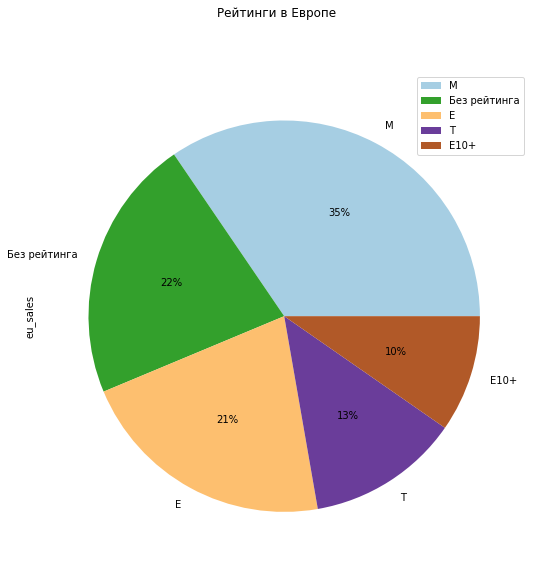

In [65]:
df.query("year_of_release >= 2014").pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Рейтинги в Европе', colormap='Paired')

Видно, что 37% от всех продаж игр приходится на Тип рейтинга M, далее идут игры типа Е со своими 21%, далее идут игры без рейтинга с 20%, E10+ с 11%, и также T с 11%.

### Япония

Сформируем сводную таблицу, показывающую количество продаж игр для каждой платформы в Японии и отсортируем по убыванию

In [66]:
df.query("year_of_release >= 2014").pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

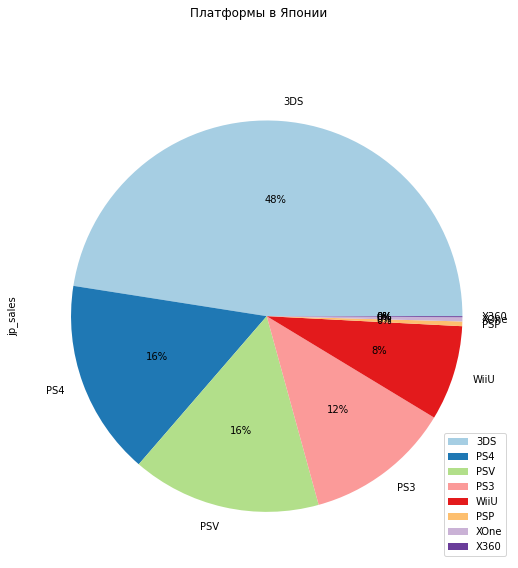

In [67]:
df.query("year_of_release >= 2014").pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Платформы в Японии', colormap='Paired')

Видно, что 48% от всех продаж игр приходится на 3S, далее с большим отрывом идут PS3 со своими 17%, у PSV 13%, у PS4 с 11%, WiiU с 8%.

Сформируем сводную таблицу, показывающую количество продаж игр для каждого жанра в Японии и отсортируем по убыванию

In [68]:
df.query("year_of_release >= 2014").pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

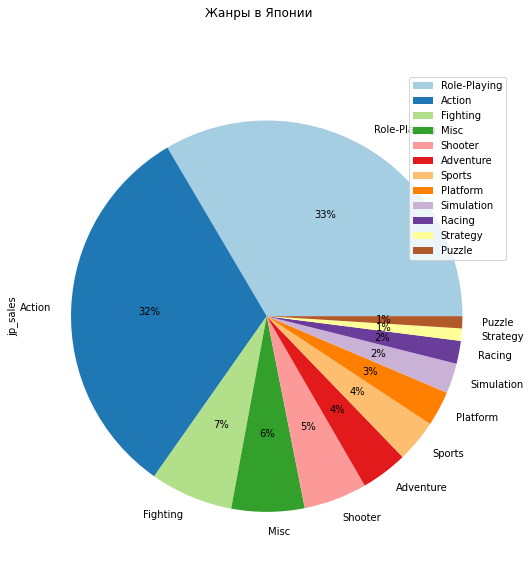

In [69]:
df.query("year_of_release >= 2014").pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Жанры в Японии', colormap='Paired')

Видно, что 36% от всех продаж игр приходится на Role-Playing, далее с небольшим отрывом идет Action со своими 29%, далее Misc с 7%, Fighting с 5%, и Shooter с 5%.

Сформируем сводную таблицу, показывающую количество продаж игр для типа рейтинга в Японии и отсортируем по убыванию

In [70]:
df.query("year_of_release >= 2014").pivot_table(index='rating',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
Без рейтинга,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Построим круговую диаграмму по полученной сводной таблице

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

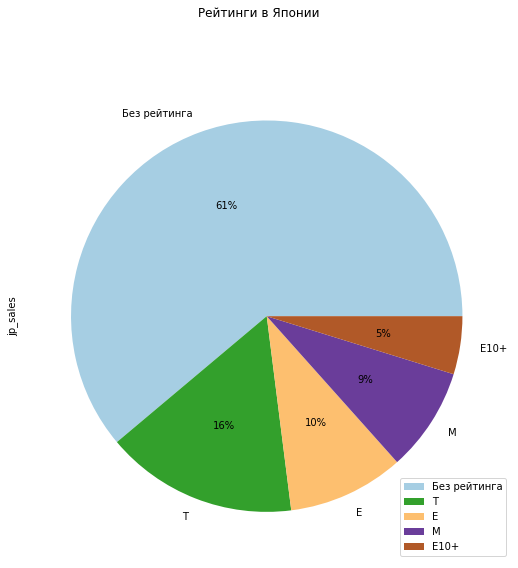

In [71]:
df.query("year_of_release >= 2014").pivot_table(index='rating',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(9,9), title='Рейтинги в Японии', colormap='Paired')


Видно, что 61% от всех продаж игр приходится на игры, у которых нет рейтинга, далее идут игры типа T со своими 15%, далее идут игры с рейтингом E с 11%, M с 10%, и также E10+ с 4%.

Вывод:
В Северной Америке подавляющее большинство пользователей играет на платформах PS4, XOne или X360. Наиболее популярные жанры: Action, Shooter или Sports. Чаще всего игры имеют рейтинг M (Mature) или E (Everyone) по оценке ESRB
В Европе подавляющее большинство пользователей играет на платформах PS4, PS3 или XOne. Наиболее популярные жанры: Action, Shooter или Sports. Чаще всего игры имеют рейтинг M (Mature) или E (Everyone) по оценке ESRB
В Японии подавляющее большинство пользователей играет на платформах 3DS, PS3 или PSV (PS Vita). Наиболее популярные жанры: Action или Role-Playing. Чаще всего игры имеют рейтинг T (Teen) или E (Everyone) по оценке ESRB.
Видно, что во всех регионах преобладает жанр Action, в каждом регионе предпочитают минимум одну из приставок от PlayStaiton и рейтинг, который выбирают везде – E (Everyone).
Целевые аудитории Северной Америки и Европы очень схожи по своим предпочтениям, а Япония сильно отличается от них.
Помимо этого в Японии 61% от всех продаж игр приходится на игры, у которых нет рейтинга. Это связано с тем, что в Японии не действует данный рейтинг.

## 5. Проверьте гипотезы
Задание:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Построим гистограммы распределений пользовательских оценок для двух платформ.

<AxesSubplot:title={'center':'Xbox One'}, ylabel='Frequency'>

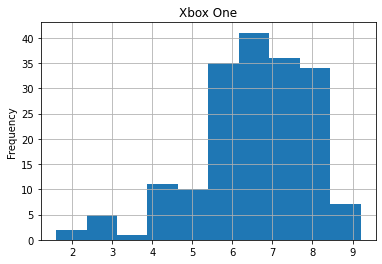

In [72]:
df.query('(platform == "XOne") & (user_score > 0) & (year_of_release > 2012)')['user_score'].plot(kind='hist', title='Xbox One', grid=True)

<AxesSubplot:title={'center':'PC'}, ylabel='Frequency'>

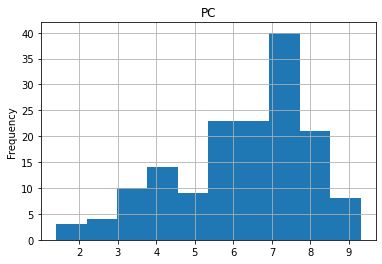

In [73]:
df.query('(platform == "PC") & (user_score > 0) & (year_of_release > 2012)')['user_score'].plot(kind='hist', title='PC', grid=True)

Сформулируем гипотезу, по которой будем сравнивать две платформы:
– В качестве нулевой гипотезы примем, что средние оценки на двух этих платформах одинаковы
– В качестве альтернативной гипотезы примем, средние оценки на двух этих платформах различаются
– Пороговое значение alpha будет равно 0.05 (5%)
– Так как дисперсии сравниваемых выборок необязательно равны, будем использовать t-тест ttest_ind(), который можно использовать для проверок гипотез о равенстве двух генеральных совокупностей

In [74]:
results = st.ttest_ind(df.query('(platform == "XOne") & (user_score > 0) & (year_of_release > 2012)')['user_score'], df.query('(platform == "PC") & (user_score > 0) & (year_of_release > 2012)')['user_score'])
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вывод: мы не можем отвергнуть нулевую гипотезу.

### Гипотеза №2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Построим гистограммы распределений пользовательских оценок для двух рассматриваемых жанров.

<AxesSubplot:title={'center':'Action'}, ylabel='Frequency'>

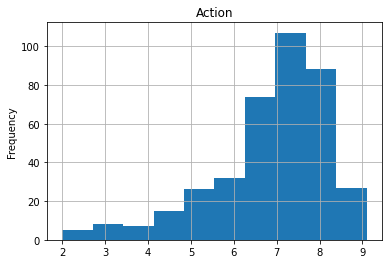

In [75]:
df.query('(genre == "Action") & (user_score > 0) & (year_of_release > 2012)')['user_score'].plot(kind='hist', title='Action', grid=True)

<AxesSubplot:title={'center':'Sports'}, ylabel='Frequency'>

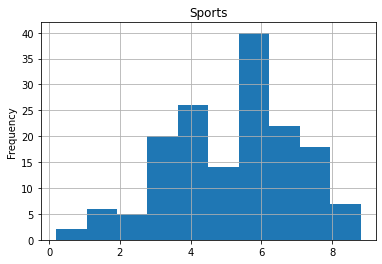

In [76]:
df.query('(genre == "Sports") & (user_score > 0) & (year_of_release > 2012)')['user_score'].plot(kind='hist', title='Sports', grid=True)

Сформулируем гипотезу, по которой будем сравнивать две платформы:
– В качестве нулевой гипотезы примем, что средние оценки на двух этих жанров равны
– В качестве альтернативной гипотезы примем, что средние оценки на двух этих жанров отличаются
– Пороговое значение alpha будет равно 0.05 (5%)
– Так как дисперсии сравниваемых выборок необязательно равны, будем использовать t-тест ttest_ind(), который можно использовать для проверок гипотез о равенстве двух генеральных совокупностей

In [77]:
results = st.ttest_ind(df.query('(genre == "Action") & (user_score > 0) & (year_of_release > 2012)')['user_score'], df.query('(genre == "Sports") & (user_score > 0) & (year_of_release > 2012)')['user_score'])
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.0517832389140023e-27
Отвергаем нулевую гипотезу


Вывод: мы отвергаем нулевую гипотезу.

## 6. Общий вывод
1. Была проведена первичная обработка данных
2. Была проведена предобработка данных:
Изменены названия столбцов и приведены в корректный вид, изменены типы данных у двух столбцов, был проверен датафрейм на пропуски в данных и заполнены пропуски.
3. Был проведен исследовательский анализ данных:
3.1. Получено, что до 1994 года выпускали пренебрежимо малое количество игр
3.2. Рассчитан жизненный цикл игровой платформы: в среднем платформы переживают свой пик популярности в течение 5-7 лет.
3.3. Проанализированы продажи по платформам в актуальном периоде, то есть в течение последних примерно 2 полных лет. Лидерами оказались PS4 и XOne, а PS3, X360 и WiiU к 2017 году закончат свой жизненный цикл.
3.4. Проанализированы продажи по самым популярным платформам в актуальном периоде Этими платформами оказались PS4, PS3, XOne, PC, WiiU. Показано, что платформа PS4 вырвалась в лидеры
3.5. Было получено, что Продажи игр коррелируют с оценками критиков для двух платформ, но не коррелируют с оценками пользователей. Вероятнее всего, такая же ситуация прослеживается, и с другими платформами: Пользователи обращают внимание исключительно на оценки критиков.
3.6. Были получены популярные жанры – это Action, Shooter, Sports, Role-Playing. По графику суммарных продаж видно, что жанр action очень популярен, однако по графикам средних и медианных продаж видно, что продажа игр этого жанра приносит намного меньше прибыли, чем Шутеры. Следовательно, фаворитом среди жанров стоило бы выделить Шутер
4. Были проанализированы целевые аудитории трех регионов
Целевые аудитории Северной Америки и Европы очень схожи по своим предпочтениям, а Япония сильно отличается от них. Игры без рейтинга в Японии популярны в связи с тем, что на Японию не распространяется рейтинговый стандант ESRB, который используется в оценке игр проекта.
5. Был проведен статистический анализ данных
Проанализирована Гипотеза №1: Наши данные ей противоречат
Проанализирована Гипотеза №2: Наши данные ей противоречат